<a href="https://colab.research.google.com/github/mariajuliapessoa/Desafio-Kaggle-Flight-Delays/blob/main/MARIA_J%C3%9ALIA_PESSOA_CUNHA_ML_Pratica_05_Desafio_do_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
test =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flight_delays_test.csv")
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flight_delays_train.csv')

# Informações dos dados

In [6]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [7]:
df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


# Gráfico do dataset atual

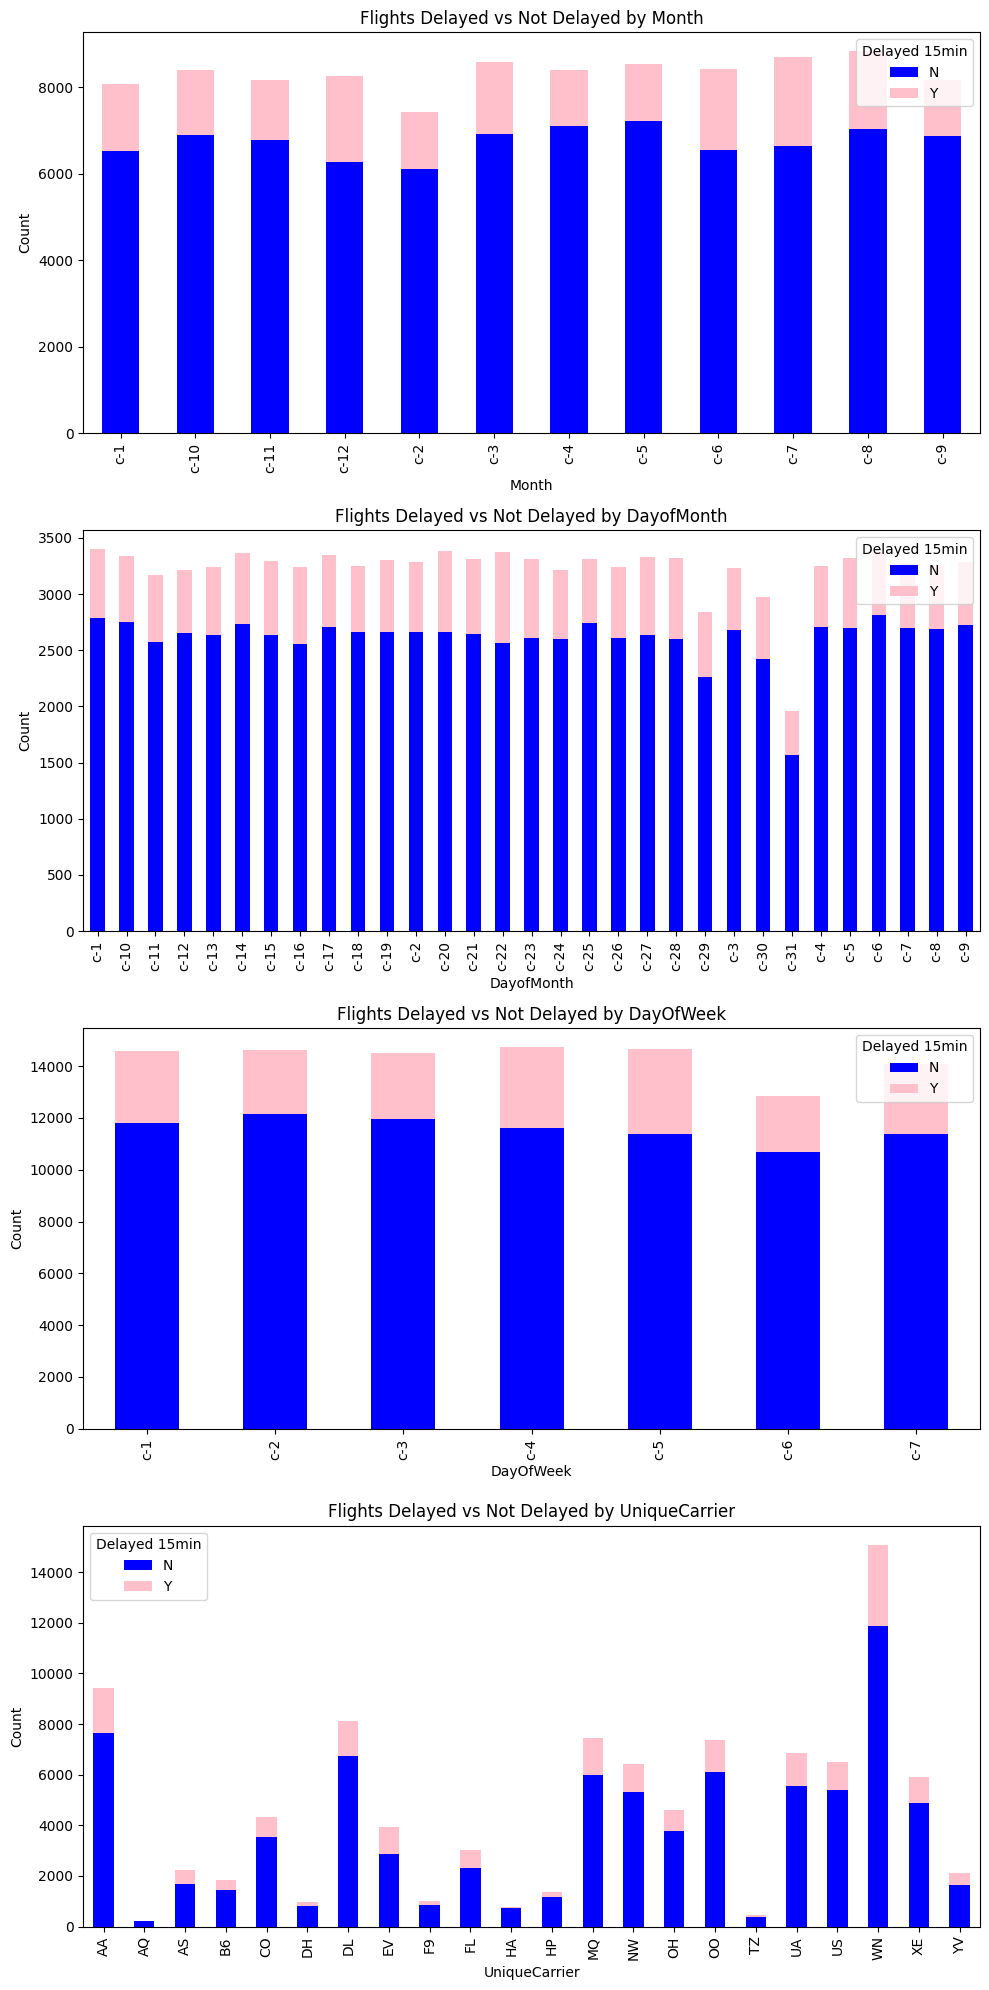

In [9]:
df['dep_delayed_15min'] = df['dep_delayed_15min'].astype('category')

columns_to_plot = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier']

# Creating subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 5 * len(columns_to_plot)))

# Colors for the bars
colors = ['blue', 'pink']

for i, column in enumerate(columns_to_plot):
    # Getting counts of delays
    delay_counts = df.groupby([column, 'dep_delayed_15min']).size().unstack(fill_value=0)
    # Plotting the counts with custom colors
    delay_counts.plot(kind='bar', ax=axes[i], stacked=True, title=f'Flights Delayed vs Not Delayed by {column}', color=colors)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Delayed 15min')

plt.tight_layout()
plt.show()


# Criando a coluna TimeOfTheDay

In [15]:
# Ensure IsDelayed is integer
df['IsDelayed'] = df['dep_delayed_15min'].map({'Y': 1, 'N': 0}).astype(int)

# Define the function to categorize departure time
def categorize_dep_time(dep_time):
    if dep_time >= 500 and dep_time < 1200:
        return 'Morning'
    elif dep_time >= 1200 and dep_time < 1700:
        return 'Afternoon'
    elif dep_time >= 1700 and dep_time < 2100:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new 'TimeOfDay' column
df['TimeOfTheDay'] = df['DepTime'].apply(categorize_dep_time)

print(df.dtypes)

time_of_the_day_delay = df.groupby('TimeOfTheDay')['IsDelayed'].agg(['sum', 'count']).reset_index()

# Calculando o delay
time_of_the_day_delay['DelayRate'] = time_of_the_day_delay['sum'] / time_of_day_delay['count']



Month                  object
DayofMonth             object
DayOfWeek              object
DepTime                 int64
UniqueCarrier          object
Origin                 object
Dest                   object
Distance                int64
dep_delayed_15min    category
IsDelayed               int64
TimeOfTheDay           object
dtype: object


# Plotando a nova coluna

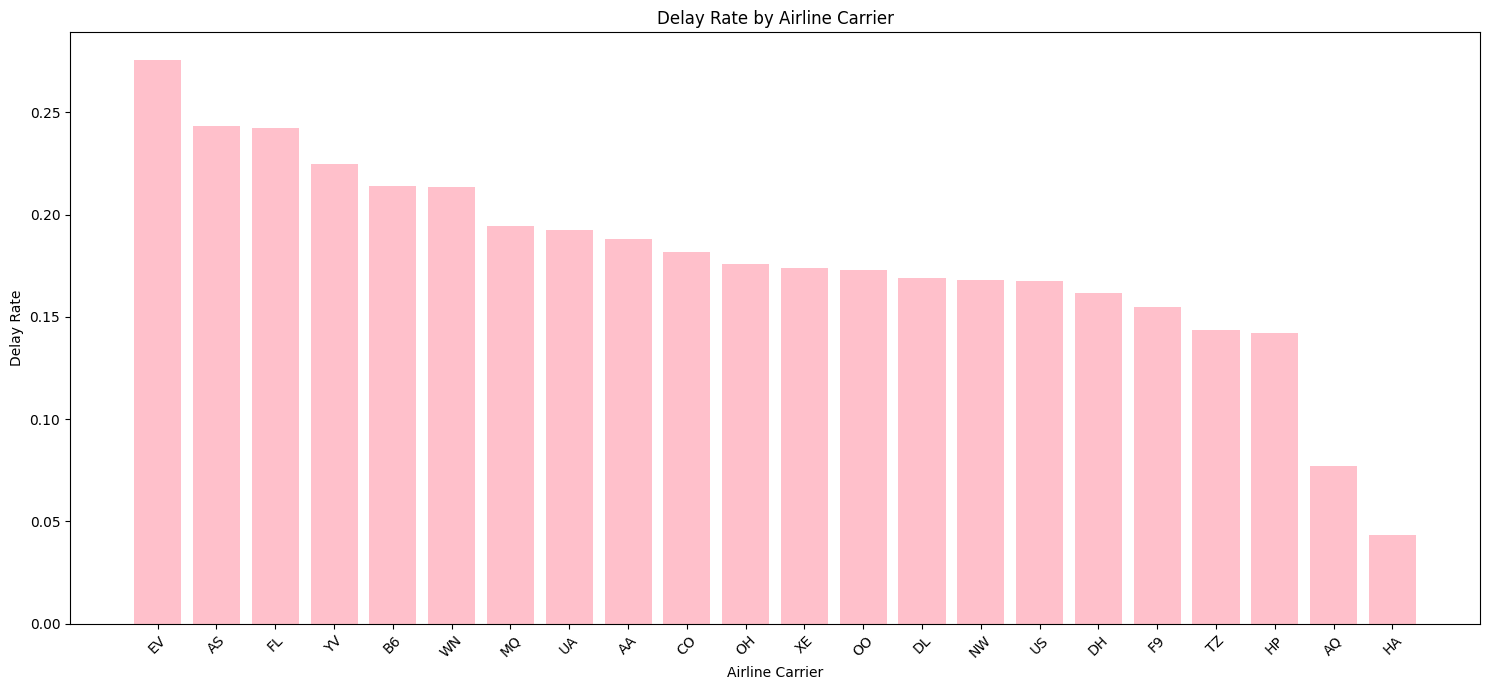

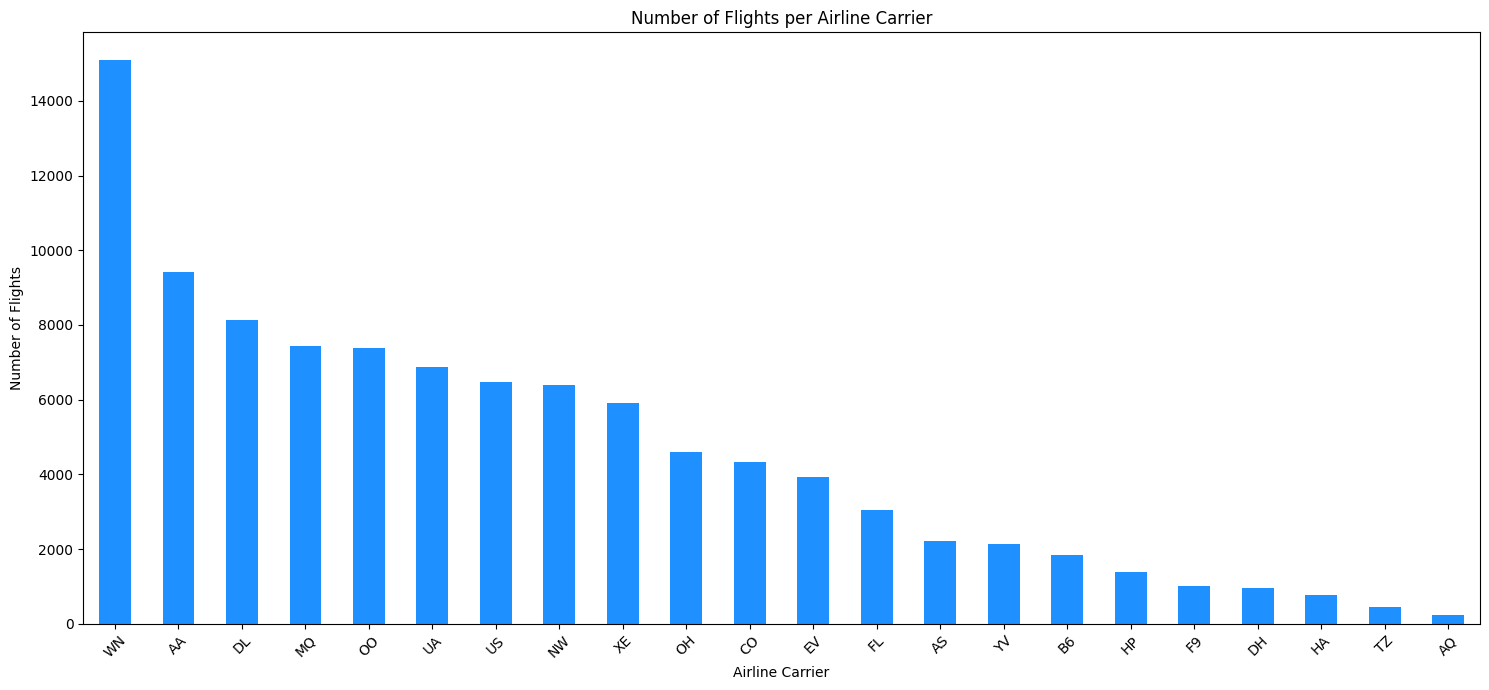

In [11]:
# Calculate delay rates by airline carrier
carrier_delays = df.groupby('UniqueCarrier')['IsDelayed'].agg(['sum', 'count'])
carrier_delays['DelayRate'] = carrier_delays['sum'] / carrier_delays['count']
carrier_delays_sorted = carrier_delays.sort_values('DelayRate', ascending=False)

# Plot the delay rates
plt.figure(figsize=(15, 7))
plt.bar(carrier_delays_sorted.index, carrier_delays_sorted['DelayRate'], color='pink')
plt.xlabel('Airline Carrier')
plt.ylabel('Delay Rate')
plt.title('Delay Rate by Airline Carrier')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Count the number of flights per airline carrier
flight_counts_per_airline = df['UniqueCarrier'].value_counts().sort_values(ascending=False)

# Plot the flight counts
plt.figure(figsize=(15, 7))
flight_counts_per_airline.plot(kind='bar', color='dodgerblue')
plt.xlabel('Airline Carrier')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Airline Carrier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


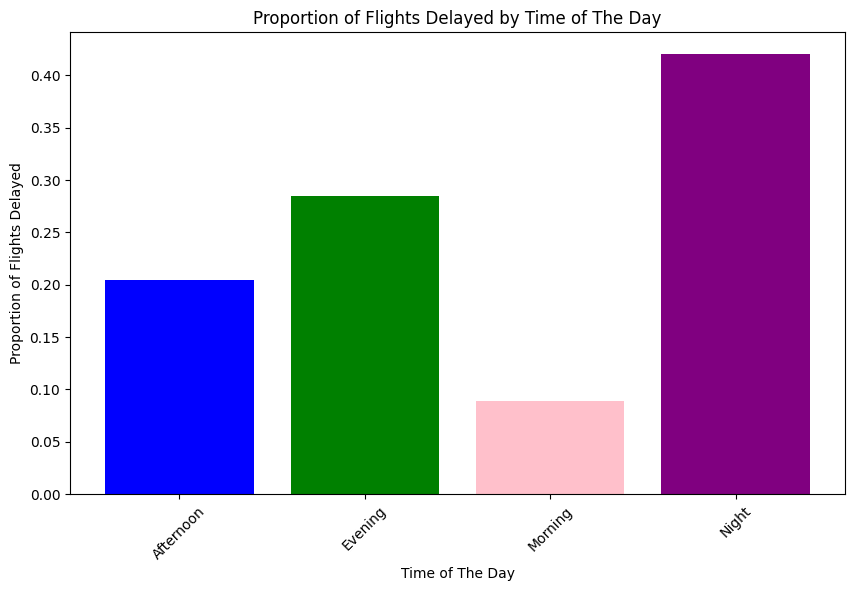

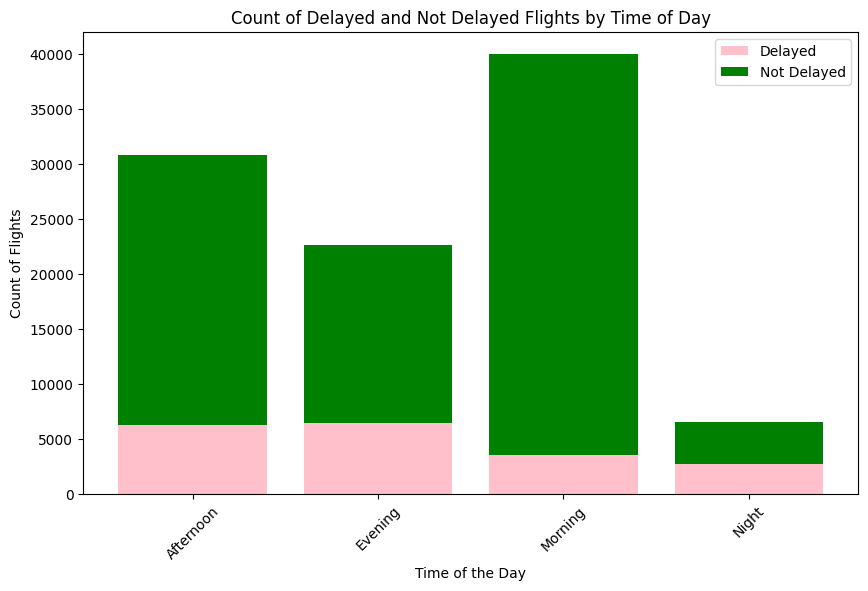

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(time_of_the_day_delay['TimeOfTheDay'], time_of_the_day_delay['DelayRate'], color=['blue', 'green', 'pink', 'purple'])
plt.xlabel('Time of The Day')
plt.ylabel('Proportion of Flights Delayed')
plt.title('Proportion of Flights Delayed by Time of The Day')
plt.xticks(rotation=45)
plt.show()

#time_of_day_delay = df.groupby('TimeOfTheDay')['IsDelayed'].agg(['sum', 'count']).reset_index()
plt.figure(figsize=(10, 6))

# Plotting the count of delayed flights
plt.bar(time_of_the_day_delay['TimeOfTheDay'], time_of_the_day_delay['sum'], color='pink', label='Delayed')

# Plotting the count of non-delayed flights
plt.bar(time_of_the_day_delay['TimeOfTheDay'], time_of_the_day_delay['count'] - time_of_the_day_delay['sum'],
        bottom=time_of_the_day_delay['sum'], color='green', label='Not Delayed')

plt.xlabel('Time of the Day')
plt.ylabel('Count of Flights')
plt.title('Count of Delayed and Not Delayed Flights by Time of Day')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Criando a coluna IsWeekend

In [18]:
# Add a new 'IsWeekend' feature to indicate whether the flight is on a weekend
# Days 6 (Saturday) and 7 (Sunday) will be considered as weekend

# Convert 'DayOfWeek' from string to int if it's not already in the correct type
df['DayOfWeek'] = df['DayOfWeek'].str.extract('(\d)').astype(int)

# Create the 'IsWeekend' column (1 if DayOfWeek is 6 or 7, else 0)
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)


# Plotando a nova coluna

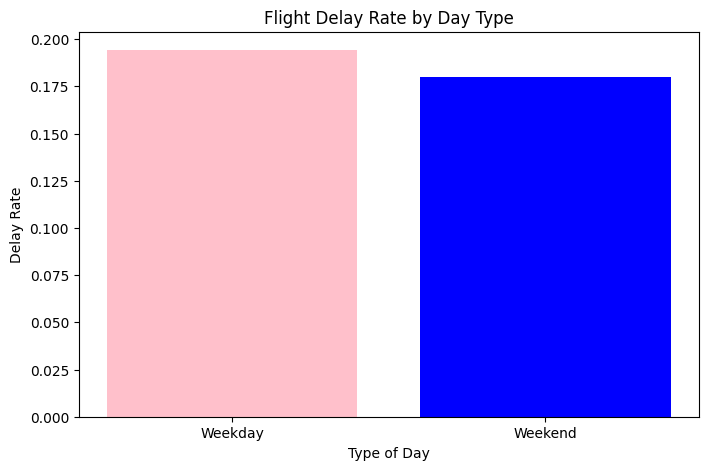

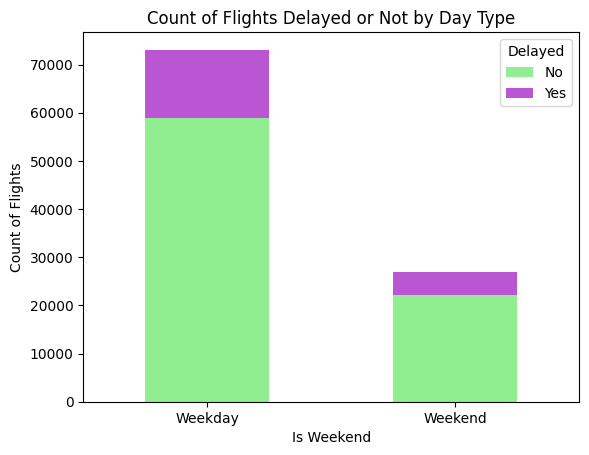

In [20]:
# Group by 'IsWeekend' and calculate delay rates
weekend_delay = df.groupby('IsWeekend')['IsDelayed'].agg(['sum', 'count'])
weekend_delay['DelayRate'] = weekend_delay['sum'] / weekend_delay['count']

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(['Weekday', 'Weekend'], weekend_delay['DelayRate'], color=['pink', 'blue'])
plt.xlabel('Type of Day')
plt.ylabel('Delay Rate')
plt.title('Flight Delay Rate by Day Type')
plt.show()

weekend_counts = df.groupby(['IsWeekend', 'dep_delayed_15min']).size().unstack(fill_value=0)

# Plot the stacked bar chart
weekend_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'mediumorchid'])
plt.xlabel('Is Weekend')
plt.ylabel('Count of Flights')
plt.title('Count of Flights Delayed or Not by Day Type')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.legend(title='Delayed', labels=['No', 'Yes'])
plt.show()



# Criando a coluna Season

In [22]:
def get_season(month_str):
    month = int(month_str.strip('c-'))
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

# Plotando a nova coluna

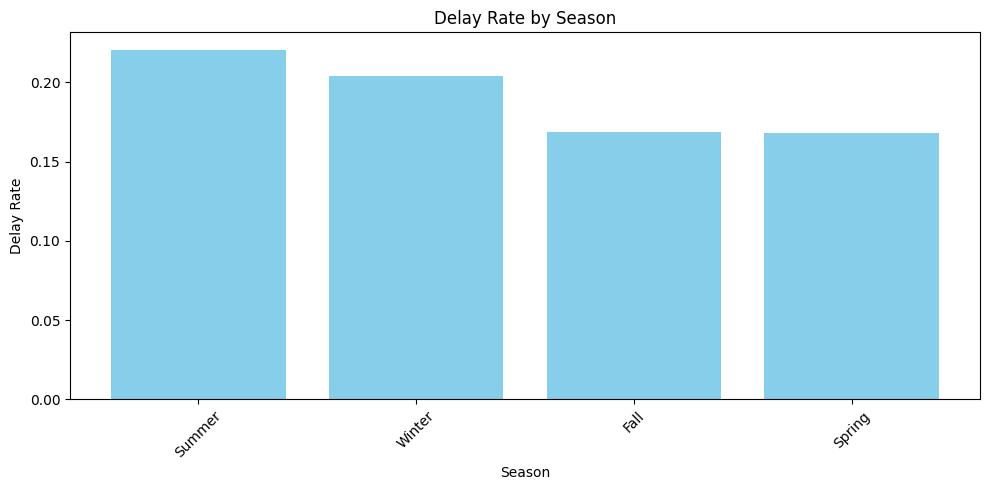

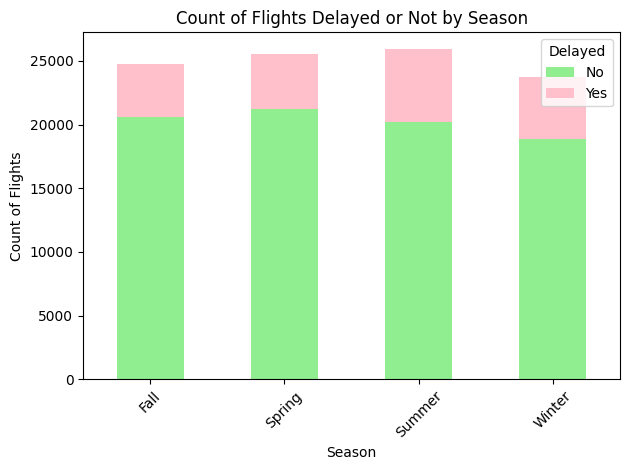

In [24]:
# Group by 'Season' and calculate delay rates
season_delays = df.groupby('Season')['IsDelayed'].agg(['sum', 'count'])
season_delays['DelayRate'] = season_delays['sum'] / season_delays['count']
season_delays_sorted = season_delays.sort_values('DelayRate', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(season_delays_sorted.index, season_delays_sorted['DelayRate'], color='skyblue')
plt.xlabel('Season')
plt.ylabel('Delay Rate')
plt.title('Delay Rate by Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by 'Season' and 'dep_delayed_15min' to count flights
season_flight_counts = df.groupby(['Season', 'dep_delayed_15min']).size().unstack(fill_value=0)

# Plot the stacked bar chart of flight counts by season and delay status
season_flight_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'pink'])
plt.xlabel('Season')
plt.ylabel('Count of Flights')
plt.title('Count of Flights Delayed or Not by Season')
plt.xticks(rotation=45)
plt.legend(title='Delayed', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


In [25]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,IsDelayed,TimeOfTheDay,IsWeekend,Season
0,c-8,c-21,7,1934,AA,ATL,DFW,732,N,0,Evening,1,Summer
1,c-4,c-20,3,1548,US,PIT,MCO,834,N,0,Afternoon,0,Spring
2,c-9,c-2,5,1422,XE,RDU,CLE,416,N,0,Afternoon,0,Fall
3,c-11,c-25,6,1015,OO,DEN,MEM,872,N,0,Morning,1,Fall
4,c-10,c-7,6,1828,WN,MDW,OMA,423,Y,1,Evening,1,Fall


# Criando novas colunas para aprimorar o aproveitamento do Catboost

In [26]:
# Extracting the departure hour in two-digit format (hhmm), converting to int, and then to str
df['DepHour'] = (df['DepTime'] // 100).astype(int).astype(str)

# Creating a new column 'Route' by concatenating 'Origin' and 'Dest' with an underscore '_'
df['Route'] = df['Origin'] + "_" + df['Dest']

# Creating a new column 'Carrier_Origin' by concatenating 'UniqueCarrier' and 'Origin' with an underscore '_'
df['Carrier_Origin'] = df['UniqueCarrier'] + "_" + df['Origin']

# Creating a new column 'Carrier_Dest' by concatenating 'UniqueCarrier' and 'Dest' with an underscore '_'
df['Carrier_Dest'] = df['UniqueCarrier'] + "_" + df['Dest']

# Creating a new column 'Carrier_DepHour' by concatenating 'UniqueCarrier' and 'DepHour' with an underscore '_'
df['Carrier_DepHour'] = df['UniqueCarrier'] + '_' + df['DepHour'].astype('str')

# Creating a new column 'Route_DepHour' by concatenating 'Route' and 'DepHour' with an underscore '_'
df['Route_DepHour'] = df['Route'] +  '_' + df['DepHour'].astype('str')

# Removing the prefix 'c-' from 'Month' and 'DayofMonth' columns and converting to int
df['Month'] = df['Month'].str.replace('c-', '').astype(int)
df['DayofMonth'] = df['DayofMonth'].str.replace('c-', '').astype(int)

# Saving the modified DataFrame to a CSV file named 'newtrain.csv' without the index
df.to_csv('newtrain.csv', index=False)

In [27]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,IsDelayed,TimeOfTheDay,IsWeekend,Season,DepHour,Route,Carrier_Origin,Carrier_Dest,Carrier_DepHour,Route_DepHour
0,8,21,7,1934,AA,ATL,DFW,732,N,0,Evening,1,Summer,19,ATL_DFW,AA_ATL,AA_DFW,AA_19,ATL_DFW_19
1,4,20,3,1548,US,PIT,MCO,834,N,0,Afternoon,0,Spring,15,PIT_MCO,US_PIT,US_MCO,US_15,PIT_MCO_15
2,9,2,5,1422,XE,RDU,CLE,416,N,0,Afternoon,0,Fall,14,RDU_CLE,XE_RDU,XE_CLE,XE_14,RDU_CLE_14
3,11,25,6,1015,OO,DEN,MEM,872,N,0,Morning,1,Fall,10,DEN_MEM,OO_DEN,OO_MEM,OO_10,DEN_MEM_10
4,10,7,6,1828,WN,MDW,OMA,423,Y,1,Evening,1,Fall,18,MDW_OMA,WN_MDW,WN_OMA,WN_18,MDW_OMA_18


# Aplicando modelos de árvore de decisão

Pré processamento dos dados

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

# Loading data from CSV file
train_data = pd.read_csv('newtrain.csv')

# Separating features (X) and target (y)
X = train_data.drop(['dep_delayed_15min', 'IsDelayed', 'Season', 'IsWeekend'], axis=1)
y = train_data['dep_delayed_15min'].apply(lambda x: 1 if x == 'Y' else 0)

# Defining categorical features to be transformed
categorical_features = ['UniqueCarrier', 'Origin', 'Dest', 'TimeOfTheDay', 'Route', 'Carrier_Origin',
                        'Carrier_Dest', 'Carrier_DepHour', 'Route_DepHour']

# Creating a preprocessor to transform categorical features into one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Applying preprocessing to the features
X_processed = preprocessor.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


Treinamento e avaliação do modelo Decision Tree Classifier

Decision Tree ROC AUC: 0.5966930419309788
Decision Tree CV ROC AUC: 0.5857501384577036


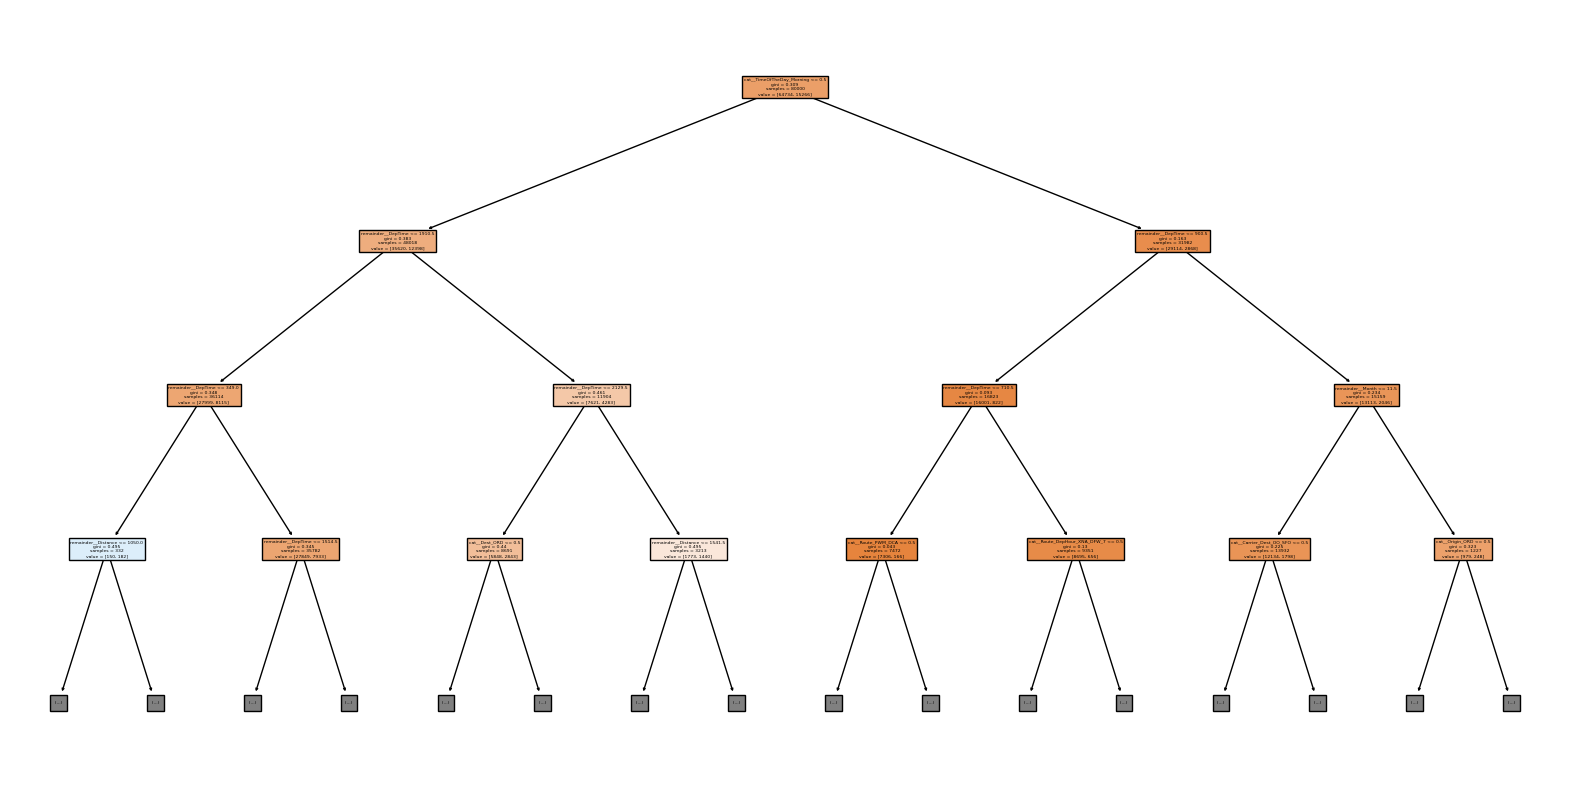

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Creating and training the Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting probabilities on the test set
dt_y_pred = dt_classifier.predict_proba(X_test)[:, 1]

# Calculating ROC AUC score on the test set
dt_roc_auc = roc_auc_score(y_test, dt_y_pred)

# Calculating average ROC AUC using cross-validation (CV)
dt_cv_score = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='roc_auc').mean()

# Displaying the ROC AUC score and CV ROC AUC score
print('Decision Tree ROC AUC:', dt_roc_auc)
print('Decision Tree CV ROC AUC:', dt_cv_score)

# Plotting the decision tree
plt.figure(figsize=(20, 10))
from sklearn.tree import plot_tree
plot_tree(dt_classifier, filled=True, feature_names=preprocessor.get_feature_names_out(), max_depth=3)
plt.show()

Treinamento e avaliação dos modelos Random Forest e Gradient Boosting

In [31]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Creating and training the Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting probabilities on the test set
rf_y_pred = rf_classifier.predict_proba(X_test)[:, 1]

# Calculating ROC AUC score on the test set
rf_roc_auc = roc_auc_score(y_test, rf_y_pred)

# Calculating average ROC AUC using cross-validation (CV) for Random Forest
rf_cv_score = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='roc_auc').mean()

# Creating and training the Gradient Boosting Classifier model
gbdt_classifier = GradientBoostingClassifier(random_state=42)
gbdt_classifier.fit(X_train, y_train)

# Predicting probabilities on the test set
gbdt_y_pred = gbdt_classifier.predict_proba(X_test)[:, 1]

# Calculating ROC AUC score on the test set
gbdt_roc_auc = roc_auc_score(y_test, gbdt_y_pred)

# Calculating average ROC AUC using cross-validation (CV) for Gradient Boosting
gbdt_cv_score = cross_val_score(gbdt_classifier, X_train, y_train, cv=5, scoring='roc_auc').mean()

# Displaying the ROC AUC score and CV ROC AUC score for Random Forest and Gradient Boosting
print('Random Forest ROC AUC:', rf_roc_auc)
print('Random Forest CV ROC AUC:', rf_cv_score)
print('GBDT ROC AUC:', gbdt_roc_auc)
print('GBDT CV ROC AUC:', gbdt_cv_score)

Random Forest ROC AUC: 0.737292784622364
Random Forest CV ROC AUC: 0.7250391538216518
GBDT ROC AUC: 0.7264375284849656
GBDT CV ROC AUC: 0.7199800286104032


# Ajustando o arquivo para teste

In [34]:
test_data_path = '/content/drive/MyDrive/Colab Notebooks/flight_delays_test.csv'
sample_submission_path = '/content/drive/MyDrive/Colab Notebooks/sample_submission.csv/sample_submission.csv'
test_data = pd.read_csv(test_data_path)
sample_submission = pd.read_csv(sample_submission_path)

test_data.head(), sample_submission.head()


def create_additional_features(df):

    df['Month'] = df['Month'].apply(lambda x: int(x.split('-')[1]))
    df['DayofMonth'] = df['DayofMonth'].apply(lambda x: int(x.split('-')[1]))
    df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x: int(x.split('-')[1]))


    bins = [0, 600, 1200, 1800, 2400]
    labels = ['Night', 'Morning', 'Afternoon', 'Evening']
    df['TimeOfTheDay'] = pd.cut(df['DepTime'], bins=bins, labels=labels, right=False)

    df['DepHour'] = (df['DepTime'] // 100).astype(int).astype(str)

    df['Route'] = df['Origin'] + "_" + df['Dest']
    df['Carrier_Origin'] = df['UniqueCarrier'] + "_" + df['Origin']
    df['Carrier_Dest'] = df['UniqueCarrier'] + "_" + df['Dest']
    df['Carrier_DepHour'] = df['UniqueCarrier'] + '_' + df['DepHour']
    df['Route_DepHour'] = df['Route'] + '_' + df['DepHour']

    return df

test_data = create_additional_features(test_data)

test_data.head()

test_data.to_csv('newtest.csv', index=False)


# Criando arquivos para submissão

In [35]:
def create_submission_file(predictions, model_name):
    submission = sample_submission.copy()
    submission['dep_delayed_15min'] = predictions
    submission.to_csv(f'{model_name}_predictions.csv', index=False)


processed_test_data = preprocessor.transform(test_data)


create_submission_file(dt_classifier.predict_proba(processed_test_data)[:, 1], 'decision_tree')
create_submission_file(rf_classifier.predict_proba(processed_test_data)[:, 1], 'random_forest')
create_submission_file(gbdt_classifier.predict_proba(processed_test_data)[:, 1], 'gbdt')

# Modelo Catboost

In [36]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.6 MB/s eta 0:00:00


In [37]:
import pandas as pd
from catboost import CatBoostClassifier, cv, Pool

train_data = pd.read_csv('newtrain.csv')
test_data = pd.read_csv('newtest.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv/sample_submission.csv')

categorical_features = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest', 'TimeOfTheDay', 'DepHour',
                        'Route', 'Carrier_Origin', 'Carrier_Dest', 'Carrier_DepHour', 'Route_DepHour']

# Separating features (X_train) and target (y_train) for training
X_train = train_data.drop(['dep_delayed_15min', 'IsDelayed', 'IsWeekend', 'Season'], axis=1)
y_train = train_data['dep_delayed_15min'].apply(lambda x: 1 if x == 'Y' else 0)

# Creating a Pool object for training with CatBoost
train_pool = Pool(X_train, y_train, cat_features=categorical_features)

# Parameters for CatBoost model
params = {
    'iterations': 1000,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'random_seed': 42,
    'verbose': 100
}

# Performing cross-validation to find the best iteration
cv_results = cv(
    params=params,
    pool=train_pool,
    fold_count=5,
    seed=42,
    shuffle=True,
    stratified=True
)

# Finding the best iteration based on the highest AUC score
best_iteration = cv_results['test-AUC-mean'].idxmax()

# Updating parameters with the best iteration
params.update({'iterations': best_iteration})

# Creating the final CatBoostClassifier model with updated parameters
final_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    l2_leaf_reg=3,
    random_strength=1,
    bagging_temperature=1,
    random_seed=42,
    verbose=100
)

final_model.fit(train_pool, verbose=False)

# Handling missing values in categorical features for test data
for cat_feature in categorical_features:
    test_data[cat_feature] = test_data[cat_feature].fillna('missing')

# Creating a Pool object for test data with categorical features
test_pool = Pool(test_data, cat_features=categorical_features)

# Making predictions on the test data using the final model
predictions = final_model.predict_proba(test_pool)[:, 1]

# Creating a submission DataFrame with predictions
submission_df = pd.DataFrame({'id': sample_submission['id'], 'dep_delayed_15min': predictions})

# Saving the submission file to a CSV
submission_file_path = 'catboost_submission.csv'
submission_df.to_csv(submission_file_path, index=False)


Training on fold [0/5]
0:	test: 0.7012488	best: 0.7012488 (0)	total: 706ms	remaining: 11m 45s
100:	test: 0.7754736	best: 0.7754736 (100)	total: 1m	remaining: 9m 2s
200:	test: 0.7837830	best: 0.7837830 (200)	total: 1m 35s	remaining: 6m 17s
300:	test: 0.7865468	best: 0.7865468 (300)	total: 2m 8s	remaining: 4m 58s
400:	test: 0.7877662	best: 0.7878054 (393)	total: 2m 58s	remaining: 4m 26s
500:	test: 0.7889659	best: 0.7889659 (500)	total: 3m 38s	remaining: 3m 37s
600:	test: 0.7900978	best: 0.7901781 (592)	total: 4m 13s	remaining: 2m 48s
700:	test: 0.7909269	best: 0.7909643 (686)	total: 4m 49s	remaining: 2m 3s
800:	test: 0.7918475	best: 0.7919493 (788)	total: 5m 26s	remaining: 1m 21s
900:	test: 0.7920076	best: 0.7922328 (844)	total: 6m 2s	remaining: 39.8s
999:	test: 0.7921109	best: 0.7922328 (844)	total: 6m 38s	remaining: 0us

bestTest = 0.7922328277
bestIteration = 844

Training on fold [1/5]
0:	test: 0.6668941	best: 0.6668941 (0)	total: 336ms	remaining: 5m 35s
100:	test: 0.7829283	best: 0.